# Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg


# 1. Import and warehouse data:

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os, glob

In [2]:
# load json file using pandas
df1 = pd.read_json('Part1 - Car-Attributes.json')

In [3]:
# convert dataframe to csv file
df1.to_csv("Part1-Cars-A.csv",index=False)

In [4]:
df2 = pd.read_csv("Part1 - Car name.csv")

In [5]:
df = pd.concat([df1, df2], axis=1, join='inner')


print(df.head())
df.to_csv('cars_merged.csv')

    mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino


# 2.Data cleansing

In [6]:
df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [7]:
df.dtypes


mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [8]:
df.shape

(398, 9)

In [9]:
df.size

3582

In [10]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [12]:
# Na shows no missing value, but on careful data observation we could see "?" for hp values
df[df['hp']=="?"]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [13]:
# Now try to impute with mean of respective cylinders, but before this we must see the distribution for the variable
# We would drop na values and check distribution before taking call on whether imputation would be through mean, median 
import seaborn as sns
hp = df['hp'].dropna()
hp.count()

398

In [14]:
df['hp'] = df['hp'].apply(str).str.replace('?','')

In [15]:
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')
df = df.dropna(subset=['hp'])
df['hp'] = df['hp'].astype(float)

In [16]:
import seaborn as sns
hp = df['hp']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


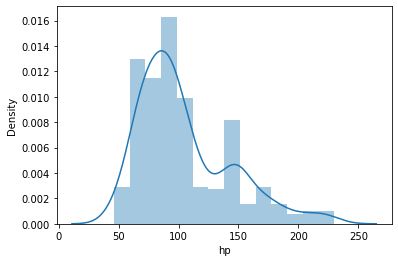

In [17]:
sns.distplot(pd.to_numeric(hp))

Perform bi variate analysis including correlation, pairplots and state the inferences

In [18]:
df.corr(method='kendall')

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.687444,-0.678586,-0.679166,-0.694243,0.303146,0.415247,0.468383
cyl,-0.687444,1.000000,0.796611,0.686146,0.738015,-0.368486,-0.270179,-0.556915
disp,-0.678586,0.796611,1.000000,0.718471,0.799706,-0.353873,-0.219933,-0.572568
hp,-0.679166,0.686146,0.718471,1.000000,0.703730,-0.488239,-0.277831,-0.406024
wt,-0.694243,0.738015,0.799706,0.703730,1.000000,-0.268563,-0.199813,-0.499051
acc,0.303146,-0.368486,-0.353873,-0.488239,-0.268563,1.000000,0.198396,0.178324
yr,0.415247,-0.270179,-0.219933,-0.277831,-0.199813,0.198396,1.000000,0.136037
origin,0.468383,-0.556915,-0.572568,-0.406024,-0.499051,0.178324,0.136037,1.000000


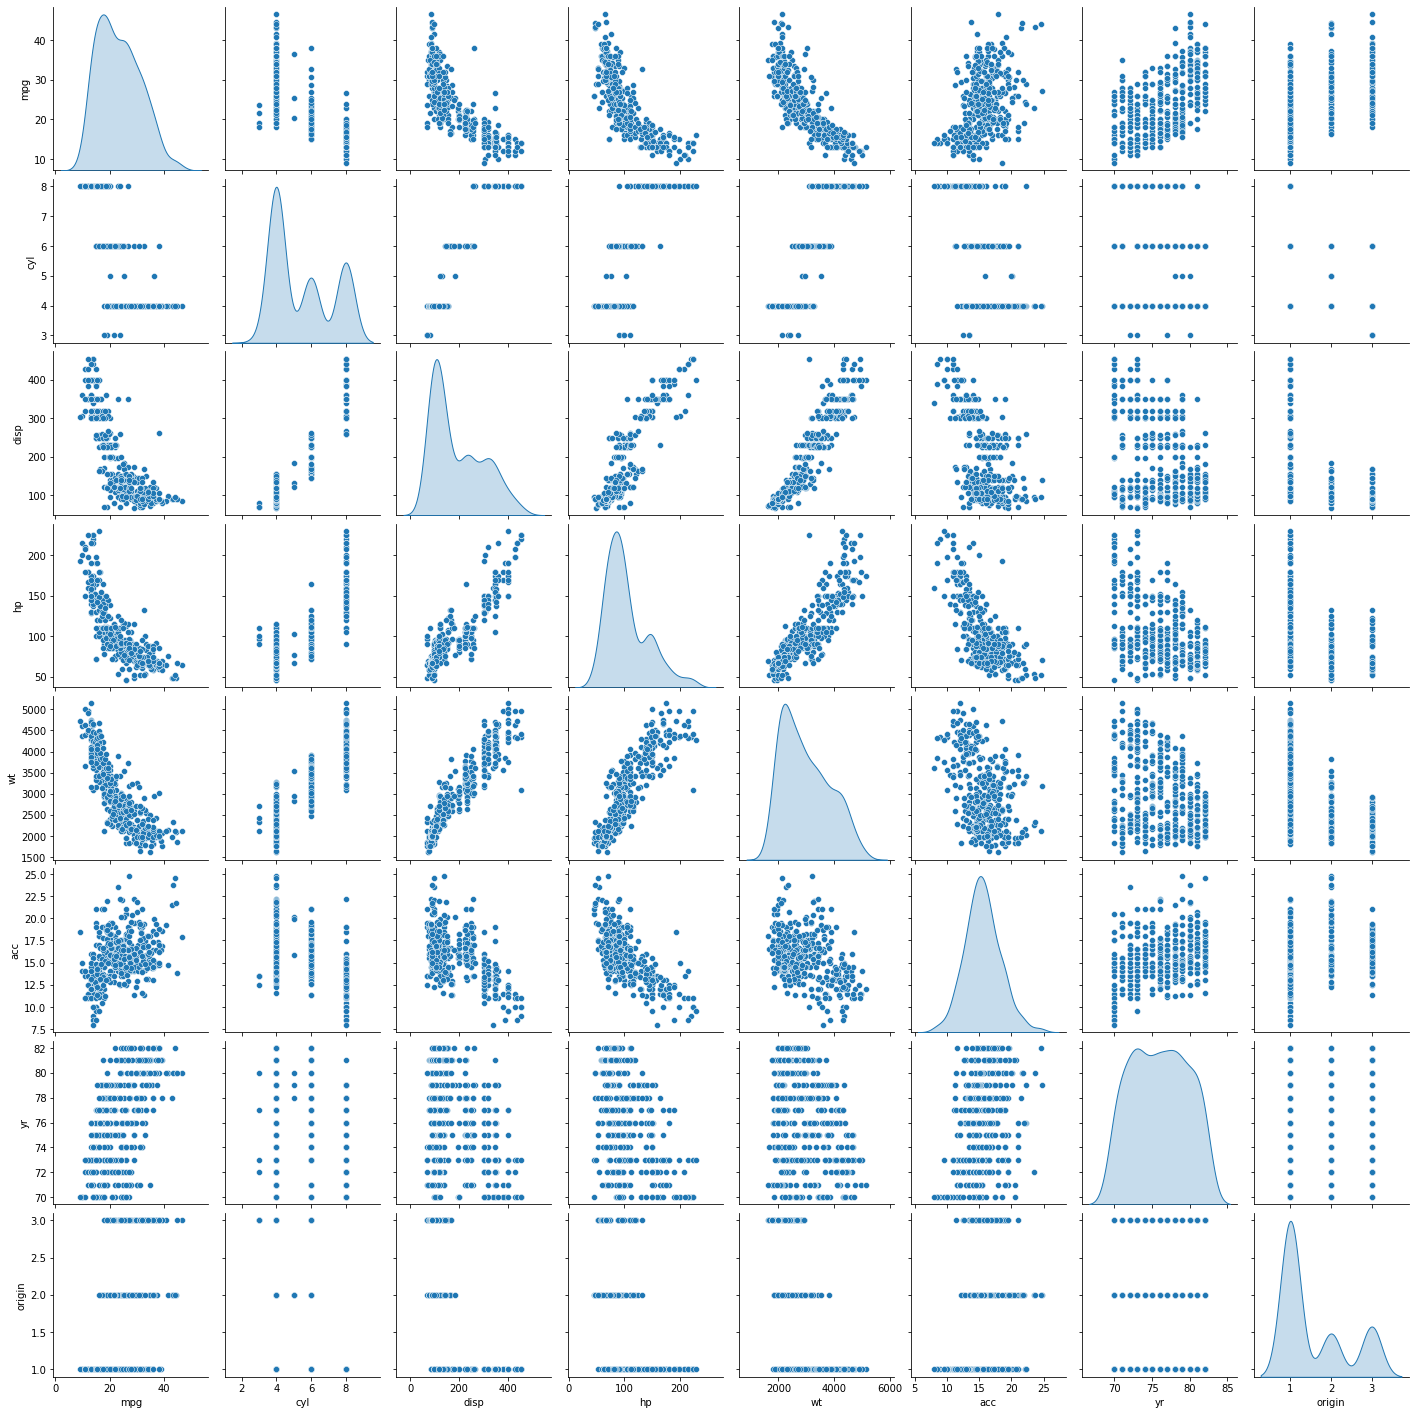

In [19]:
sns.pairplot(df,diag_kind='kde')

In [21]:
# Observations
# From diagonal plots we can see origin has 3 points (evident from data)
# yr - shows two peaks majorily
# acc,mpg are nearly normal
# cyl and disp shows 3 clusters while wt shows 2

# from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 


In [22]:
df.groupby(df['cyl']).mean()

,mpg,disp,hp,wt,acc,yr,origin
cyl,,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000,3.000000
4,29.283920,109.670854,78.281407,2305.110553,16.581910,77.030151,2.000000
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000,2.000000
6,19.973494,218.361446,101.506024,3202.120482,16.254217,75.951807,1.192771
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913,1.000000


# **K-Means Clutering**

**Perform any feature engineering/transformation and remove any duplicate or irrelevant columns**

In [23]:
# Further dig into data shows max mpg is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
# subtract year from 83 to get the age
# Other continuous variables should be checked for outliers and should be normlized using z-score

In [24]:
# Calculate age of vehicle
df['age'] = 83-df['yr']
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13


In [25]:
#Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(df['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
df = df.join(one_hot)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13,1,0,0


In [26]:
# Let us now remove duplicate/irrelevant columns

cars_new = df.drop(['yr','origin','car_name'], axis =1)

cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,13,1,0,0


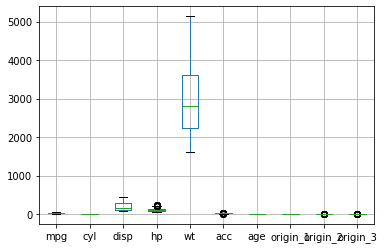

In [27]:
cars_new.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x7fe6c813ddd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe6c8143e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe6c814ae90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe6c814a950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe6c81433d0>,
  <matplotlib.lines.Line2D at 0x7fe6c8143910>]}

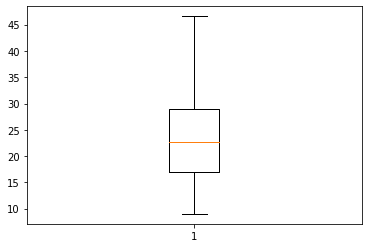

In [28]:
# We could see some outliers for mpg,hp and acc
plt.boxplot(cars_new['mpg'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe6c80b3890>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe6c80b7910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe6c80bd950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe6c80bd410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe6c80b3e50>,
  <matplotlib.lines.Line2D at 0x7fe6c80b73d0>]}

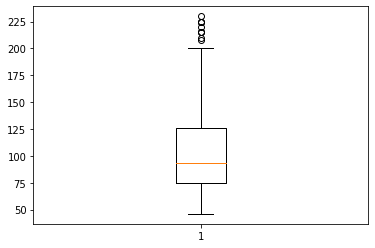

In [29]:

plt.boxplot(cars_new['hp'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe6c80a6350>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe6c802c3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe6c8034410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe6c802ce90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe6c80a6910>,
  <matplotlib.lines.Line2D at 0x7fe6c80a6e50>]}

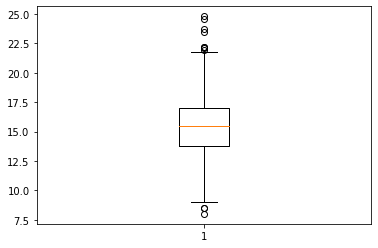

In [30]:
plt.boxplot(cars_new['acc'])

In [31]:
# Let us take logaritmic transform for hp,mpg and acc to remove outliers
cars_new['hp'] = np.log(cars_new['hp'])
cars_new['acc'] = np.log(cars_new['acc'])
cars_new['mpg'] = np.log(cars_new['mpg'])

cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,2.890372,8,307.0,4.867534,3504,2.484907,13,1,0,0
1,2.708050,8,350.0,5.105945,3693,2.442347,13,1,0,0
2,2.890372,8,318.0,5.010635,3436,2.397895,13,1,0,0
3,2.772589,8,304.0,5.010635,3433,2.484907,13,1,0,0
4,2.833213,8,302.0,4.941642,3449,2.351375,13,1,0,0


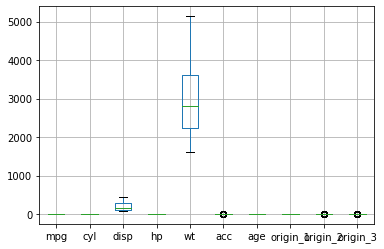

In [32]:
cars_new.boxplot()

In [33]:
# This looks better.
# Now let us try to scale the variables
from scipy.stats import zscore

cars_new.dtypes
numeric_cols = cars_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
cars_new[numeric_cols] =cars_new[numeric_cols].apply(zscore)

In [34]:
cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,-0.612303,1.483947,1.077290,0.815310,0.620540,-1.342270,1.625315,1,0,0
1,-1.149167,1.483947,1.488732,1.510507,0.843334,-1.577764,1.625315,1,0,0
2,-0.612303,1.483947,1.182542,1.232586,0.540382,-1.823726,1.625315,1,0,0
3,-0.959127,1.483947,1.048584,1.232586,0.536845,-1.342270,1.625315,1,0,0
4,-0.780612,1.483947,1.029447,1.031406,0.555706,-2.081133,1.625315,1,0,0


# Create appropriate clusters with the new data set

In [35]:
# Variables are mow scaled. Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cars_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2955.158163
1,2,1410.995721
2,3,1075.903923
3,4,857.244664
4,5,773.399883
5,6,707.731120
6,7,660.118933
7,8,617.185634
8,9,584.361745
9,10,560.401855


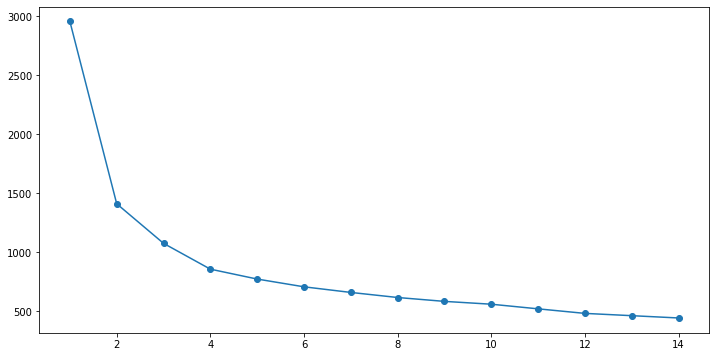

In [36]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [37]:
# We could see the bend at 4, so let us create 4 custers

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(cars_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

# Check for no of values in each cluster and centers for each variables

In [38]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 90  94  94 114]


In [39]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cars_new) )
centroid_df.transpose()

,0,1,2,3
mpg,-0.388849,0.337156,-1.295811e+00,1.097456
cyl,0.414321,-0.876503,1.483947e+00,-0.827970
disp,0.301928,-0.827895,1.489139e+00,-0.783601
hp,0.112066,-0.534080,1.429773e+00,-0.827027
wt,0.319841,-0.766421,1.391452e+00,-0.767882
acc,0.321521,0.303657,-1.139003e+00,0.434962
age,-0.020648,0.647954,6.826537e-01,-1.080867
origin_1,0.911111,0.244681,1.000000e+00,0.403509
origin_2,0.033333,0.478723,2.498002e-16,0.175439
origin_3,0.055556,0.276596,-2.498002e-16,0.421053


In [40]:
# Group 3 has highest values for mpg while 2nd has lowest
# Group 2 has max no of cylinders and 2 forms of lower cylinder values
# As seen in correlation and pairplot, Group 2 has highest values for hp,wt and displ
# Group 3 seems to be comprising of newest cars
# Group 2 and 3 seems to be originated at point 3, while 1 in 2nd point and 0 again at point 2

# Assign the groups created above to data frame and study the characteristics for each group.

In [41]:
# Add cluster number to original cars data

predictions = kmeans.predict(cars_new)
predictions
df["group"] = predictions
df['group'] = df['group'].astype('category')
df.dtypes

mpg          float64
cyl            int64
disp         float64
hp           float64
wt             int64
acc          float64
yr             int64
origin         int64
car_name      object
age            int64
origin_1       uint8
origin_2       uint8
origin_3       uint8
group       category
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6c7e3cb10>,
      dtype=object)

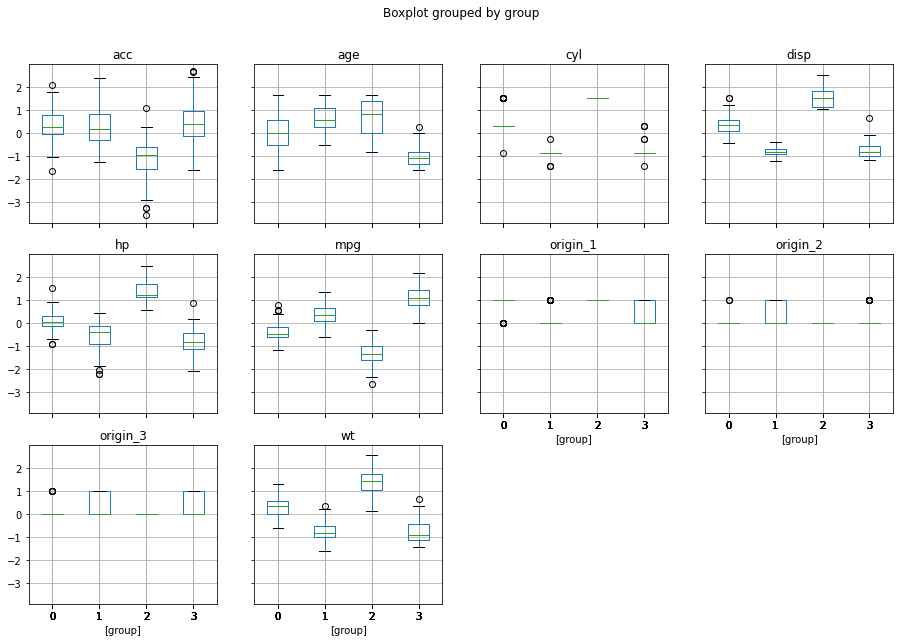

In [42]:
# Visualize the centers

cars_new["group"] = predictions
cars_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [44]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups

In [45]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
df.to_excel(writer,'Sheet1')
writer.save()

6. Conclusion and improvements


We consider to create 4 different cluters in this problem.

And Accordingly we have assigned the values to 4 different groups as we can see above.

There will be some outliers in each category from acc to mpg in group 2.

